
# My Project Notebook

**Rachel King**

***

This notebook contains all work the completed for the project associated with Applied Statistics Module undertaken as part of the Higher Diploma in Science in Data Analytics, Winter 2024

Instuctions for the project are as follow:

> Analyse the PlantGrowth R dataset

> Describe the dataset

> Perform t-tests and ANOVA on the dataset

> Explain why it is more appropriate to apply ANOVA rather that several t-tests when analysing more than two groups


## Table of Contents

****

- [Importing of Modules](#importing-of-modules)
- [Introduction](#introduction-and-description-of-the-dataset)
- [ANOVA](#anova)
- [ANOVA vs Several t-tests](#anova-vs-several-t-tests)
- [Summary](#summary)

## Importing of Modules

***

In [2]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# add link for pandas
import pandas as pd

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# add link for warnings
import warnings

# add link for seaborn
import seaborn as sns

# add link for tabulate
from tabulate import tabulate

## Introduction and Description of the Dataset

***

The PlantGrowth dataset contains the results of an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.

The dataset has two main variables, a treatment group (`ctrl`, `trt1` and `trt2`) and the weight of plants within those groups.

Source - Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall.

In [3]:
# creating the dataframe
df = pd.read_csv('data\plant_growth.csv')

In [ ]:
# a variable in python was created for the variables in the dataset
group = df["group"]
weight = df["weight"]

# a variable in python was created for each treatment group
ctrl = df[df.group == "ctrl"]
trt1 = df[df.group == "trt1"]
trt2 = df[df.group == "trt2"]

In [ ]:
ctrl_weight = np.array(ctrl["weight"])
trt1_weight = np.array(trt1["weight"])
trt2_weight = np.array(trt2["weight"])

In [ ]:
# print Weight Statistics in a table
print("Table 1 - PlantGrowth Dataset Weight Statistics")
table_of_data = df.groupby('group').agg({'weight': ['mean', 'min', 'max', 'std']}).round(2)
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Treatment Group", "Mean (g)", "Min (g)", "Max (g)", "S.D. (g)"], tablefmt='grid', stralign='center'))
print('\n')

Table 1 - PlantGrowth Dataset Weight Statistics
+-------------------+------------+-----------+-----------+------------+
|  Treatment Group  |   Mean (g) |   Min (g) |   Max (g) |   S.D. (g) |
+===================+============+===========+===========+============+
|       ctrl        |       5.03 |      4.17 |      6.11 |       0.58 |
+-------------------+------------+-----------+-----------+------------+
|       trt1        |       4.66 |      3.59 |      6.03 |       0.79 |
+-------------------+------------+-----------+-----------+------------+
|       trt2        |       5.53 |      4.92 |      6.31 |       0.44 |
+-------------------+------------+-----------+-----------+------------+




Hisotgram to look at distribution - is it normally distributed?

### Scatter Plot

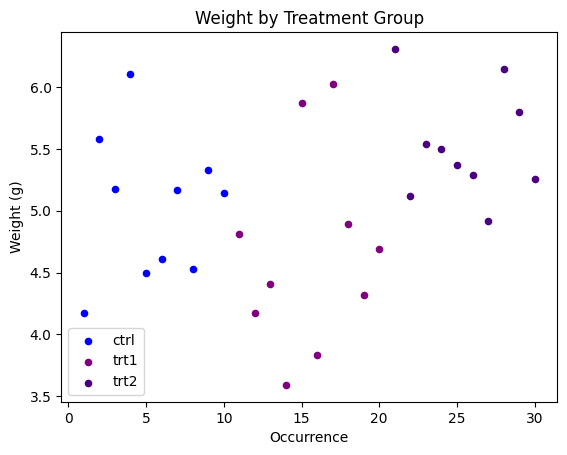

In [ ]:
# create a scatter plot of weight by treatment groups
fig, ax = plt.subplots()
colors = {'ctrl': 'blue', 'trt1': 'purple' , 
            'trt2': 'indigo'}

# to group the data by class/species
grouped = df.groupby('group')
for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='rownames', y='weight', label=key, color=colors[key])

plt.title("Weight by Treatment Group")
plt.legend()
plt.xlabel("Occurrence")
plt.ylabel("Weight (g)")
plt.show()


### Boxplots

Boxplots will give a visual representation of how the data is scattered over the plane. It shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

I decided to use a box plot as a method of visualising the distribution of the data for weight by treatment group.

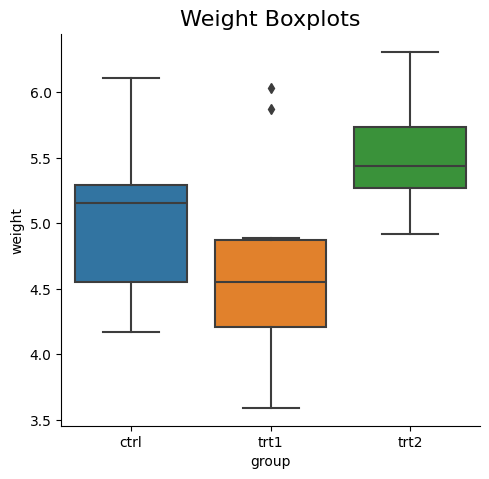

In [ ]:
# to prevent future warnings error from displaying
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
warnings.simplefilter(action='ignore', category=FutureWarning) 

# plot an individual plot for Weight by Treatment Group
# plotting a boxplot using seaborn
y = sns.catplot(data=df, x="group", y="weight", kind="box")
plt.title('Weight Boxplots', fontsize=16)
# to adust the plot so the title is legible
y.figure.subplots_adjust(top=.90); 

### Violin Plots
Violin plots are similar to histograms and box plots in that they demonstrate the probability distribution of the data. Rather than showing counts of data points that fall into bins or order statistics, violin plots use kernel density estimation (KDE) to compute an empirical distribution of the sample.

I used the violin plot to visualise the distribution of weight across the different treatment groups. We can see there is a distinction between the three treatment groups in terms of the dried weight of the plants.

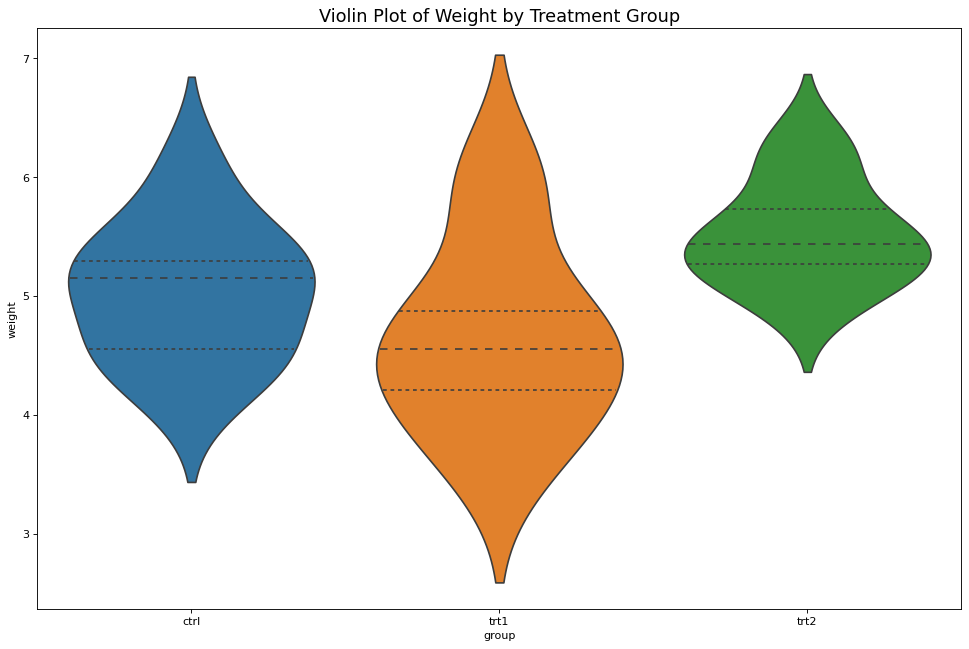

In [ ]:
# to plot a violin plot for Weight by Treatment Group
fig, ax = plt.subplots(figsize=(12,8), dpi= 80, constrained_layout=True)
sns.violinplot(x='group', y='weight', data=df, scale='width', inner='quartile')
plt.title('Violin Plot of Weight by Treatment Group', fontsize=16);

## t-test
***

The t-test is a common statistical method used to determine whether there is a significant difference between the means of two groups. In the field of statistics and data analysis, t-tests are widely used to compare sample populations and infer conclusions about the larger population.

[builtin.com](https://builtin.com/data-science/t-test-python)

There are a number of assumptions required for the t-test to generate valid results.

These are:
- Independence of observations
- Normality
- Equal variances

**Null Hypothesis** : There is no difference in mean crop yield between the treatment groups.

In [10]:
# Perform a t-test between control and treatment 1 groups
t1, p1 = stats.ttest_ind(ctrl_weight, trt1_weight)

t1, p1

(1.1912603818487009, 0.2490231659730067)

In [11]:
# Perform a t-test between control and treatment 2 groups
t2, p2 = stats.ttest_ind(ctrl_weight, trt2_weight)

t2, p2

(-2.1340204531240654, 0.04685138491157358)

In [12]:
# Perform a t-test between treatment 1 and treatment 2 groups
t3, p3 = stats.ttest_ind(trt1_weight, trt2_weight)

t3, p3

(-3.0100985421243616, 0.0075184261182198574)

With a p-value of 0.0075, the independent t-test has determined that there is a statistically significant difference between the two treatment groups, `trt1` and `trt2`.

With the null hypothesis that there is no difference between the means of the two treatment groups, given a p-value as seen in the above t-test, the null hypothesis would be rejected.

## ANOVA

***

There are six assumptions of One-way ANOVA:

- Data is normally distributed
- No significant outliers
- Dependent variable should be continuously measured
- Independent variable should have at least two categorical, independent groups
- No relationship between the observations in each group or between groups
- Homogeneity of variances, std deviations of groups should be similar

In [13]:
# Is the data in the three groups normally distributed?

# There are outliers in trt1_weight but not the other two groups.

# Dependent variable is a continuous measurement.

# Independent variable has three categorical groups.

# The std dev of the groups are not that similar - in particular between trt1 and trt2


In [ ]:
# Perform the anova
f, p = stats.f_oneway(ctrl_weight, trt1_weight, trt2_weight)

# Show
f, p

(4.846087862380136, 0.0159099583256229)

With a p-value of 0.0159, the one-way ANOVA has determined that there is a statistically significant difference between the three groups.

Given a null hypothesis that there is no difference between the means of the three treatment groups, given a p-value as seen in the above ANOVA, the null hypothesis would be rejected.

In [ ]:
# Tukey's HSD
res = stats.tukey_hsd(ctrl_weight, trt1_weight, trt2_weight)

# Show
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



Tukey's HSD gives an indication comparisons between any 2 particular groups, using a number of pairwise tests.

From this, we can see there is a statistically significant difference between the means of `trt1` and `trt2`, with no statistically significant difference between the means of `ctrl` with either of the two treatment groups `trt1` and `trt2`.

## ANOVA vs Several t-tests

***

In terms of ANOVA vs several t-tests when analysing more than three groups, the main advantage to using ANOVA is efficiency. It requires fewer statistical tests to reach a conclusion about group differences, which saves time and resources.

In a real-world scenario, performing multiple t-tests would be expensive and time-consuming, while performing a One-way ANOVA would make obtaining statistical inferences more efficient.

Another benefit around using ANOVA over multiple t-tests is around the issue of error, and protecting the type I error rate that can occur. A typical p-value is below 0.05 which represents a 5% risk of making an error when making claims about statistical significance. Using multiple t-tests and making multiple comparisons is essentially compounding this error risk with each added test, so the total experiment-wide error rate is now much higher than 5%. This is what would happen with multiple t-tests.

https://www.reddit.com/r/AskStatistics/comments/8dmfky/reddit_gold_should_i_use_multiple_t_tests_or_an/

https://www.voxco.com/blog/anova-vs-t-test-with-a-comparison-chart/#:~:text=After%20studying%20the%20above%20differences,population%20groups%2C%20we%20use%20ANOVA

## Summary

***

This notebook looked at the PlantGrowth R dataset. The dataset is described and different statistical tests are applied to the dataset including t-tests and ANOVA. The appropriateness of each statistical test is also investigated.